# Documentation

# Question 1 

I chose Simmulated Annealing as a stochastic optimiser for Task 3 

# Question 2 Why did you choose this optimiser?

The spring relies on multiple variables making the graphical image of what the data might look like very complex, this means 
we cannot just choose a simple algorithm to optimise the problem and a stochastic approach would be beneficial.
Simulated annealing allows distortion to be added to the data set to avoid getting stuck at a local minima,
this normally allows a good optimal to be found. Simulated annealing works better with continuous function approximation 
than GA algorithms. As f(x) is a continuous function this makes simulated annealing the better option that should be implemented
to solve this problem. [99 words]

# Question 3 What constraint handling method(s) are you using and why?

To handle the inequality constraints of g1 to g4 and to keep all the simulated annealing points within the feasible space I
have used death penalties. Any combinations of values (x1, x2, x3) that do not pass g1 to g4 are rejected as these would 
produce an f(x) outside of the feasible region and take up more computational power than necessary.


In [49]:
import numpy as np
import math
import random
import matplotlib as mpl
import matplotlib.pyplot as plt 

#make the random number predicatable 
np.random.seed(250599)

In [2]:
arr_X = np.array([1, 2, 3])

# Task 1 implementation of f(x)
Question 1

: the diameter of the wire (x0), 
the mean of the diameter of coil(x1)
and the number of active coils (x2)

In [3]:
def f(x, fCount=[0]):
    fun = float(x[0] ** 2)*x[1]*(2 + x[2])
#     print(fun)
    fCount[0]+=1
    return [fun, fCount[0]]

def g1(x, g1Count=[0]):
    g1Count[0]+=1
    fun = float(1 - (((x[1]**3)*x[2])/(71785*(x[0]**4))))
    if ( fun <= 0) :
        return [True, g1Count[0]]
    else:
        return [False, g1Count[0]]
    
def g2(x, g2Count=[0]):
    fun = (   (((4*x[1]**2) - (x[0]*x[1]))/(12566*((x[1]*(x[0]**3))-(x[0]**4)))) + (1/(5108*(x[0]**2)))  - 1 )
    g2Count[0]+=1
    if fun <= 0:
        return[True, g2Count[0]]
    else:
        return[False, g2Count[0]]
    
def g3(x, g3Count=[0]):
    fun = (1 - (140.45*x[0])/((x[1]**2)*x[2]))
    g3Count[0]+=1
    if fun <= 0:   
        return[True, g3Count[0]]
    else:
        return[False, g3Count[0]]
    
def g4(x, g4Count=[0]):
    fun = (  ((x[0] + x[1])/1.5)-1  )
    g4Count[0]+=1
    if fun <= 0:   
        return[True, g4Count[0]]
    else:
        return[False, g4Count[0]]
    

In [4]:
print(f(arr_X))
print(f(arr_X))
print(f(arr_X))

print (g1(arr_X))
print (g1(arr_X))
print (g1(arr_X))

print (g2(arr_X))
print (g2(arr_X))
print (g2(arr_X))

print (g3(arr_X))
print (g3(arr_X))
print (g3(arr_X))

print (g4(arr_X))
print (g4(arr_X))
print (g4(arr_X))  

[10.0, 1]
[10.0, 2]
[10.0, 3]
[False, 1]
[False, 2]
[False, 3]
[True, 1]
[True, 2]
[True, 3]
[True, 1]
[True, 2]
[True, 3]
[False, 1]
[False, 2]
[False, 3]


# Task 2 - Random Search

In [20]:
wire_lower = 0.005 #lower bound for diameter of the wire
wire_upper = 2 #upper bound for diameter of the wire

coil_lower = 0.25 #lower bound for diameter of coil
coil_upper = 1.3 #upper bound for diameter of the coil

coil_num_lower = 2 #lower bound for number of active coils
coil_num_upper = 15 #upper bound for number of active coils

In [21]:
def generate_random_array():
    #generate random number 
    x0 = np.random.uniform(low=wire_lower, high=wire_upper) #hightest + 1
    x1 = np.random.uniform(low=coil_lower, high=coil_upper) #hightest + 1
    x2 = np.random.uniform(low=coil_num_lower, high=coil_num_upper) #hightest + 1
    
    return np.array([x0, x1, x2])
    

In [23]:
def is_feasible(array):
    feasible = False
    g1_arr=g1(array)
    g2_arr=g2(array)
    g3_arr=g3(array)
    g4_arr=g4(array)

#     print(g1_arr)
#     print(g2_arr)
#     print(g3_arr)
#     print(g4_arr)

    if g1_arr[0] and g2_arr[0] and g3_arr[0] and g4_arr[0] :
        feasible = True
    else:
        feasible = False
    return feasible
    

In [24]:
def random_search(best_fx, best_x):
    
    arr_x = generate_feasible_random_array()
    
    fx = f(arr_x)
    if fx < best_fx:
        best_x = np.array([arr_x[0], arr_x[1], arr_x[2]])
#             print("best replaced")
            
    return best_x

In [25]:
def generate_feasible_random_array():
    array = generate_random_array()
    feasible = is_feasible(array)
    while not feasible:
        array = generate_random_array()
        feasible = is_feasible(array)
    return array

In [26]:
best_x = generate_feasible_random_array()
best_fx = f(best_x)

for x in range(0, 3000):
    best_x = random_search(best_fx, best_x)
print(best_x)
print(best_fx)
#print(arr_X)

#myArray = np.array(arrX)
#print(myArray)

# test = np.array([1, 2, 3])
#print (g1(arr_X))
# # #def searching(arr_X, best_X, best_fx):



[0.09378655 1.25306622 3.81256283]
[0.17347860632160522, 18032]


# Task 3 - Simulated Annealing

In [27]:
def distort(array):
    x0 = array[0]
    x1 = array[1]
    x2 = array[2]
    
    x0_new = 1000 #not feasible to begin with
    x1_new = 1000 #not feasible to begin with
    x2_new = 1000 #not feasible to begin with
    
    while not is_feasible(np.array([x0_new, x1, x2])):
        x0_new = np.random.normal(x0, 1)
#     print("i did go here")
    
    while not is_feasible(np.array([x0_new, x1_new, x2])):
        x1_new = np.random.normal(x1,1)
#     print("i did go here")
    
    while not is_feasible(np.array([x0_new, x1_new, x2_new])):
        x2_new = np.random.normal(x2,1)
#     print("i did go here")
   # print(str(x0_new) + " " + str(x1_new) + " " + str(x2_new))
        
    return [x0_new, x1_new, x2_new]

In [28]:
#test of distort method
start_values_array = generate_feasible_random_array()
print(start_values_array)
print(distort(start_values_array))

[ 0.09783659  0.99437937 13.37871039]
[0.11128466844568118, 0.962088060923967, 12.836012440711222]


#to get minimum fx
#aka the energy
#when system goes through change of configuratioj we have to calculate delta e, change in energy

#how do we chnge te configuration - randomly change the configuration c, making a move

#temperature start with max temp and then slowly decreases to t min

#for every value of temperature 
    #compute energy 
    #change config and get energy of new config
    #calculate change in energy 
    #if change in e is -ve
        #accept the move
    #else if
        #the closer we get to the end of the cycle, the less likely we are to accept bad decisions
        #compute prob e^ change in e/temperature > rand(0,1)
        #accept the move
#step 1 random 

#step 2 more careful

In [63]:
def simulated_annealing():
    
    start_values_array = generate_feasible_random_array()
    print("lets start at random " + str(start_values_array))
    best_fx = f(start_values_array)
    print("best fx so far " + str(best_fx))

        #for every value of temperature 
        #do for number of iterations
    temp_max = 3000
    temp_min = 0
    for t in range(temp_max, temp_min, -1):
        #     print(t)

            #new config
        #     print("finding neighboring set of values to compare")
        new_neighbours = distort(start_values_array)
        #     print(new_neighbours)
        new_fx = f(new_neighbours)

            #calculae change in energy
        #     print("finding delta e")
        delta_fx = new_fx[0] - best_fx[0]
        #     print(str(new_fx) + " " + str(best_fx))

        if delta_fx < 0:
            print("new delta e in the house by merit " + str(t) +" " + str(new_fx))
            best_fx = new_fx
                #print("I was bested")
        elif (math.exp(delta_fx/t) > random.uniform(1, 1.5)):
            print("new delta e in the house by probability" + str(t) +" " + str(new_fx))
            best_fx = new_fx
                #print(math.exp(delta_fx/t))
        #     print(math.exp(delta_fx/t))
    return best_fx

simulated_annealing()
print("finished")
    

lets start at random [ 0.09538115  1.03266416 12.42929057]
best fx so far [0.13555925825226842, 222323]
new delta e in the house by merit 2998 [0.13331992960854314, 222326]
new delta e in the house by merit 2993 [0.11950854905974352, 222331]
new delta e in the house by merit 2965 [0.10951640731541813, 222359]
new delta e in the house by merit 2702 [0.1089740124785221, 222622]
new delta e in the house by merit 2493 [0.1071713487235382, 222831]
new delta e in the house by merit 2372 [0.10649963209834415, 222952]
new delta e in the house by merit 2322 [0.10270713047933559, 223002]
new delta e in the house by merit 2055 [0.10206063633210291, 223269]
new delta e in the house by merit 1844 [0.10122101932408939, 223480]
new delta e in the house by merit 1709 [0.09944876512739917, 223615]
new delta e in the house by merit 923 [0.0992528900259395, 224401]
new delta e in the house by probability748 [0.1613521130139007, 224576]
new delta e in the house by merit 746 [0.1311923626126456, 224578]
ne

# Task 4 - Repeations

In [47]:
#task 4 random search

lowest_fx = 1000
highest_fx = 0

best_fx_array = np.array([])
best_x_values = np.array([])

for x in range(0, 21):
    #random search
    best_x = generate_feasible_random_array()
    best_fx = f(best_x)

    for x in range(best_fx[1], (best_fx[1]+3000)):
        best_x = random_search(best_fx, best_x)
        
    best_fx_array = np.append(best_fx_array, best_fx)   
    best_x_values = np.append(best_x_values, best_x)                 
    
    print(best_fx[0])
    print(lowest_fx)
    
    if (float(best_fx[0]) > highest_fx):
        highest_fx = best_fx[0]
    
    if (float(best_fx[0]) < lowest_fx):
        lowest_fx = best_fx[0]
    

print(best_fx_array)
print(best_x_values)
    
print(lowest_fx)
print(highest_fx)
    

0.028618897194034466
1000
0.20708027007864044
0.028618897194034466
0.2316433331246541
0.028618897194034466
0.18990566493651675
0.028618897194034466
0.09963952604863617
0.028618897194034466
0.04275542128724183
0.028618897194034466
0.08555870867483056
0.028618897194034466
0.03582046208578196
0.028618897194034466
0.23571738589886412
0.028618897194034466
0.07872234540976512
0.028618897194034466
0.029505845167172248
0.028618897194034466
0.09508206257637965
0.028618897194034466
0.030877585812225508
0.028618897194034466
0.10397737926344036
0.028618897194034466
0.07656952427078105
0.028618897194034466
0.09728970664726809
0.028618897194034466
0.04673262687184222
0.028618897194034466
0.04673858710838047
0.028618897194034466
0.053987377777129426
0.028618897194034466
0.018838098608242062
0.028618897194034466
0.08703775755515022
0.018838098608242062
[2.86188972e-02 1.56297000e+05 2.07080270e-01 1.59298000e+05
 2.31643333e-01 1.62299000e+05 1.89905665e-01 1.65300000e+05
 9.96395260e-02 1.68301000e+0

In [65]:
#task 4 simulated annealing

lowest_fx_sa = 1000
highest_fx_sa = 0

best_fx_array_sa = np.array([])

for x in range(0, 21):
    best_fx_sa = simulated_annealing()
    
    best_fx_array_sa = np.append(best_fx_array_sa, best_fx_sa)             
    
    if (float(best_fx_sa[0]) > highest_fx_sa):
        highest_fx_sa = best_fx_sa[0]
    
    if (float(best_fx_sa[0]) < lowest_fx_sa):
        lowest_fx_sa = best_fx_sa[0]

print(best_fx_array_sa)
print(best_x_values_sa)
    
print(lowest_fx_sa)
print(highest_fx_sa)

lets start at random [ 0.08741347  0.7917498  10.67944099]
best fx so far [0.0767087305812098, 225324]
new delta e in the house by merit 2999 [0.0734033102309101, 225326]
new delta e in the house by merit 2997 [0.05751900109691734, 225328]
new delta e in the house by merit 2996 [0.053491393076214956, 225329]
new delta e in the house by merit 2993 [0.04037979906012035, 225332]
new delta e in the house by merit 2985 [0.03858997531943467, 225340]
new delta e in the house by merit 2983 [0.028819984582458023, 225342]
new delta e in the house by merit 2506 [0.028344457896089182, 225819]
new delta e in the house by merit 2495 [0.028043689616221154, 225830]
new delta e in the house by merit 2126 [0.027298313895236747, 226199]
new delta e in the house by merit 1670 [0.0270215499319168, 226655]
lets start at random [0.08716206 1.27216539 7.13864635]
best fx so far [0.08832434566562755, 228325]
new delta e in the house by merit 3000 [0.0555921199492069, 228326]
new delta e in the house by merit 2

new delta e in the house by merit 2776 [0.02186028166349397, 252558]
new delta e in the house by probability17 [0.07081637742197469, 255317]
new delta e in the house by merit 16 [0.0416974720098294, 255318]
new delta e in the house by merit 7 [0.030495882202069766, 255327]
lets start at random [ 0.10902519  0.9786809  11.01547289]
best fx so far [0.1514100629993115, 255334]
new delta e in the house by merit 3000 [0.06649972863526679, 255335]
new delta e in the house by merit 2999 [0.061983379567871075, 255336]
new delta e in the house by merit 2997 [0.06030331579749988, 255338]
new delta e in the house by merit 2973 [0.057158659332977854, 255362]
new delta e in the house by merit 2963 [0.05685502099909161, 255372]
new delta e in the house by merit 2942 [0.054562647832994866, 255393]
new delta e in the house by merit 2926 [0.05435242577970277, 255409]
new delta e in the house by merit 2916 [0.05428931193597034, 255419]
new delta e in the house by merit 2865 [0.05179367261969754, 255470]

new delta e in the house by merit 2908 [0.026778110609639548, 276434]
new delta e in the house by merit 2907 [0.02669609831626467, 276435]
new delta e in the house by merit 2309 [0.023449319943897453, 277033]
new delta e in the house by probability77 [0.05814451646979935, 279265]
new delta e in the house by merit 75 [0.029327154136164903, 279267]
new delta e in the house by merit 62 [0.02798650154826222, 279280]
new delta e in the house by probability4 [0.057369814867054225, 279338]
new delta e in the house by merit 1 [0.030951098592582302, 279341]
lets start at random [0.0883456  1.04064747 8.62190432]
best fx so far [0.08627318241551793, 279342]
new delta e in the house by merit 2999 [0.07600005933313393, 279344]
new delta e in the house by merit 2997 [0.06405720225358144, 279346]
new delta e in the house by merit 2996 [0.05860492135345283, 279347]
new delta e in the house by merit 2995 [0.05842393225799899, 279348]
new delta e in the house by merit 2984 [0.05346999936021299, 279359]

NameError: name 'best_x_values_sa' is not defined

<IPython.core.display.Javascript object>


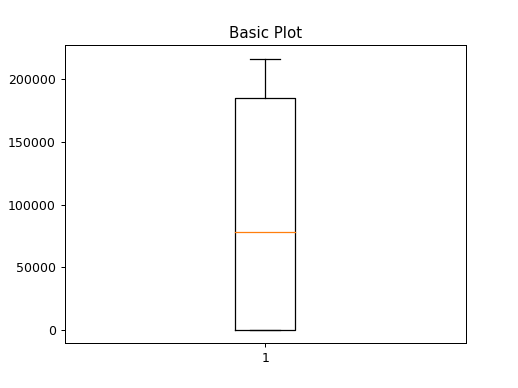

{'whiskers': [<matplotlib.lines.Line2D at 0x2b4cc676730>,
 'caps': [<matplotlib.lines.Line2D at 0x2b4cc676df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b4cc6763d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b4cc6824f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b4cc682850>],
 'means': []}

In [56]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import tkinter

# Fixing random state for reproducibility

random_data = best_fx_array
sa_data = best_fx_array_sa
data = [random_data, sa_data]

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data) 
  
# show plot 
plt.show() 

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(best_fx_array)


SyntaxError: invalid syntax (<ipython-input-34-e176826558d4>, line 1)